# Global Clusters: A Case Study on Socio-Economic and Health Indicators

## Importing the Necessary Libraries

In [1]:
# Supress Warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('https://github.com/vmahawar/data-science-datasets-collection/raw/main/country-data.csv')

In [3]:
df.shape

(167, 10)

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## **Data Dictionary**:  
  - **country**: Name of the country (categorical).  
  - **child_mort**: Child mortality rate, deaths per 1000 live births (numerical).  
  - **exports**: Exports as a percentage of GDP (numerical).  
  - **health**: Health expenditure as a percentage of GDP (numerical).  
  - **imports**: Imports as a percentage of GDP (numerical).  
  - **income**: Per capita income in USD (numerical).  
  - **inflation**: Inflation rate, annual percentage (numerical).  
  - **life_expec**: Life expectancy in years (numerical).  
  - **total_fer**: Total fertility rate, average number of children per woman (numerical).  
  - **gdpp**: GDP per capita in USD (numerical).

## Problem Statement - Identify whether a country is a country:
 - Developed
 - Developing
 - Under-Developed country

💡As there is no target variable, it is an unsupervised learning problem, hence we can use k-means clustering

## Missing Values Check

In [6]:
df.isnull().mean()

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

## Pre-Processing

In [7]:
## Calculating the absolute values of these columns

df["exports"] = df["exports"] * df["gdpp"]/100
df["imports"] = df["imports"] * df["gdpp"]/100
df["health"] = df["health"] * df["gdpp"]/100

In [8]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
## Dropping the Country Column
df1=df.drop('country',axis=1)

In [10]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1_scaled = scaler.fit_transform(df1)

In [12]:
df1_scaled

array([[4.26484907e-01, 2.95093321e-04, 3.36341972e-03, ...,
        4.75345168e-01, 7.36593060e-01, 3.07342821e-03],
       [6.81596884e-02, 6.22655666e-03, 2.94856458e-02, ...,
        8.71794872e-01, 7.88643533e-02, 3.68334145e-02],
       [1.20253165e-01, 9.31468360e-03, 2.00167874e-02, ...,
        8.75739645e-01, 2.74447950e-01, 4.03649935e-02],
       ...,
       [1.00778968e-01, 5.12723048e-03, 8.87582515e-03, ...,
        8.08678501e-01, 1.26182965e-01, 1.02988479e-02],
       [2.61441091e-01, 2.13292722e-03, 6.36206303e-03, ...,
        6.98224852e-01, 5.55205047e-01, 1.02988479e-02],
       [3.91918208e-01, 2.93402035e-03, 8.45852168e-03, ...,
        3.92504931e-01, 6.70347003e-01, 1.17305692e-02]])

## Some Terms and Concepts

#### Euclidean Distance


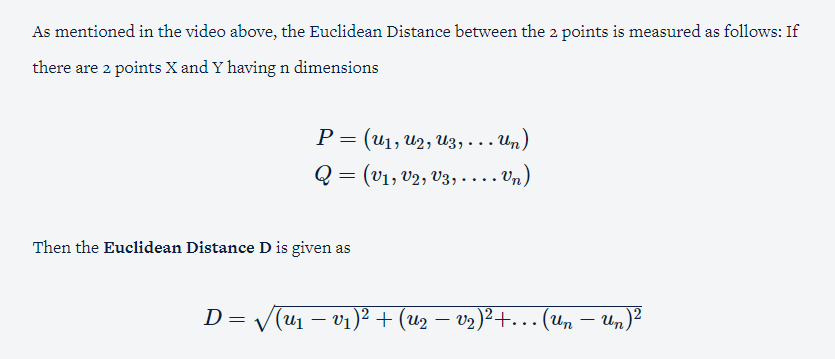

#### Centroid

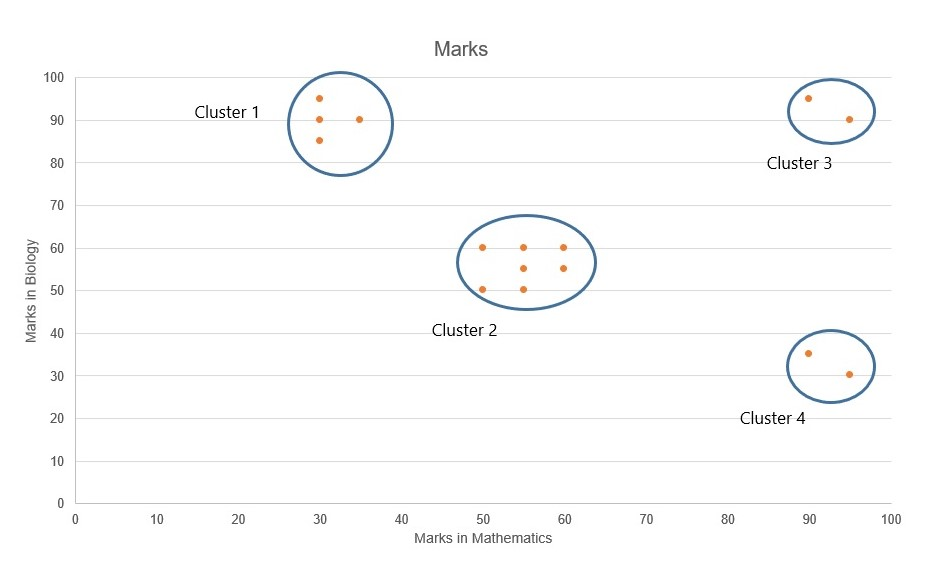

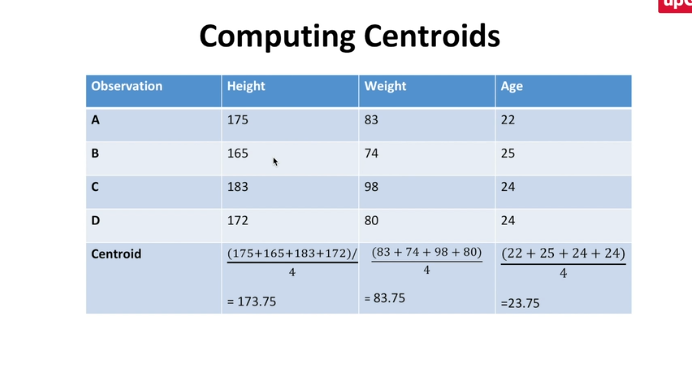

#### Steps of the Algorithm

**Assignment Step** and **Optimization Step**

 🔗[concept of the centroid](https://en.wikipedia.org/wiki/Centroid)

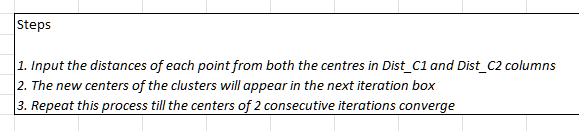

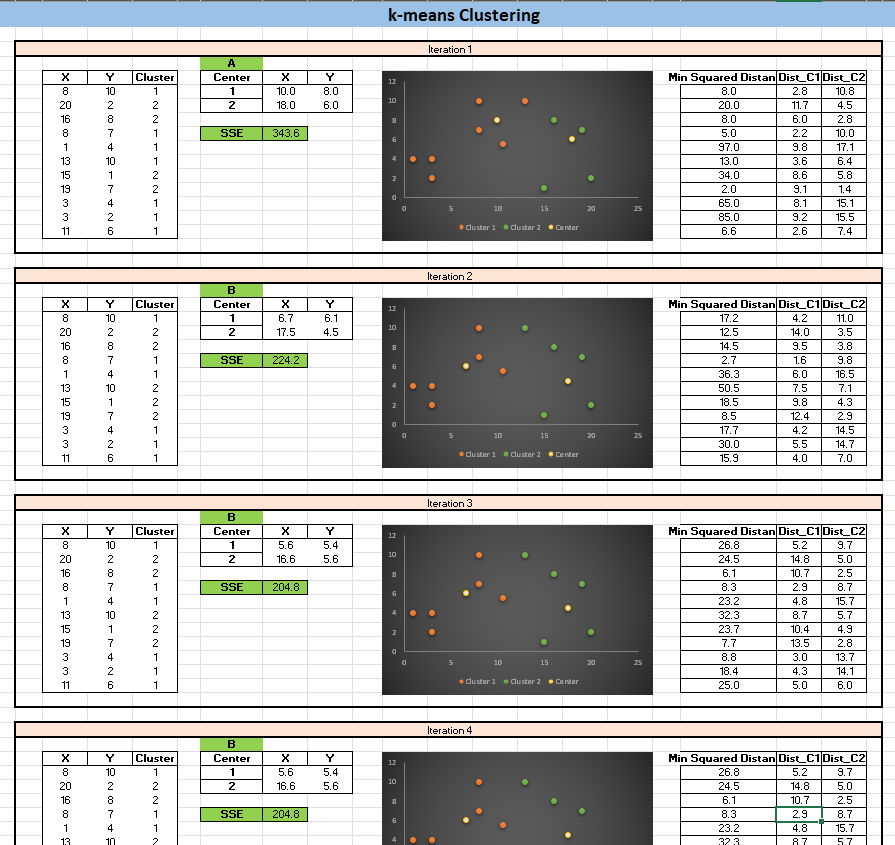

#### K Means Algorithm

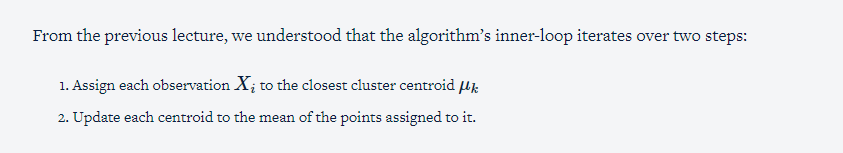

For a ith data point which is a 2d object and μ which is again a 2d object.

We compute the distance between these two, this is given by:

`d(xi, μk)`, where k is the number of clusters and then from these k different results we will choose the minimum of all.

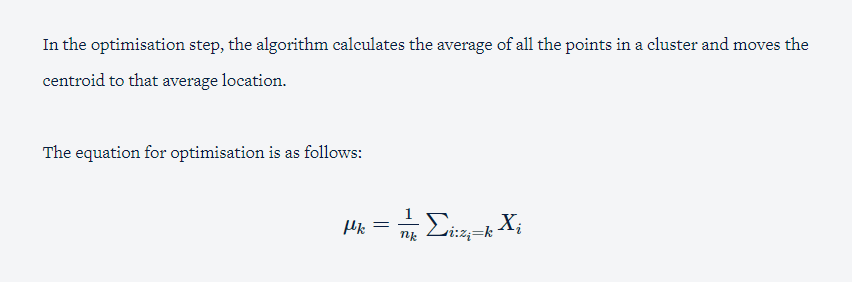

 - 🔗[Additional Reading](https://escholarship.org/uc/item/917739k8)

#### Means++ Algorithm

**Note**: In K-means++ you pick the initial centroids using an algorithm that tries to initialise centroids that are `far apart from each other`.

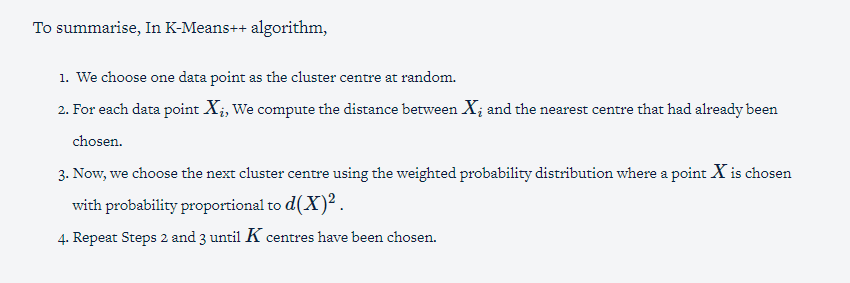

#### Visualising the K Means Algorithm

🔗[Play Ground - How to pick the initial centroids](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

#### Practical Consideration in K Means Algorithm

The choice of initial centroid points determines the final cluster

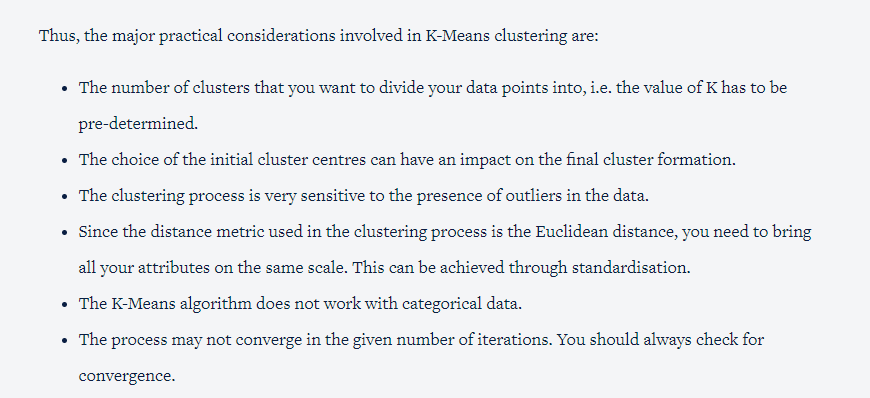

🔗[K-Modes - The Shape of Data](https://shapeofdata.wordpress.com/2014/03/04/k-modes/) - Vector Vs K-Modes

## Modelling - Introduction - K is the hyperparameter

In [26]:
k=3

In [27]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=k,random_state=100)
kmeans.fit(df1_scaled)

KMeans(n_clusters=3, random_state=100)

In [29]:
output = kmeans.predict(df1_scaled)

In [30]:
output

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [33]:
# Adding back to original dataset
df["cluster"] = output

In [32]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


After K-Mean is finalized for clustering.

## **Silhouette Metric** 

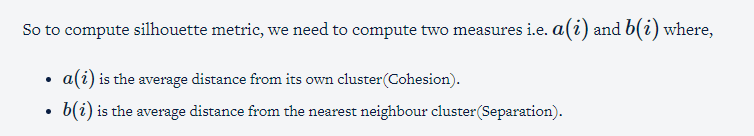

For every ith point calculate the above 2 measures

S(i) = b(i) - a(i) / (max(b(i), a(i)))

This is done for every k.

🔗[Local Maxima and Local Minima](https://en.wikipedia.org/wiki/Maximum_and_minimum)

## Cluster Tendency

🔗[**Use Hopkins Test** - For cluster tendency Validating the clustering tendency - using Hopkins statistic](https://stats.stackexchange.com/questions/332651/validating-cluster-tendency-using-hopkins-statistic)

🔗[Assessing Clustering Tendency](https://www.datanovia.com/en/lessons/assessing-clustering-tendency/#methods-for-assessing-clustering-tendency)